In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ANN import MLP
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR100('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR100('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
# criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 2000, 1000, 1000, 1000, 100]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.0131


0.0131

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        #loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification_topk(model, train_loader, device, (1,5), False)
    tst_acc = evaluateClassification_topk(model, test_loader, device, (1,5), False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, (top {}) Train Accuracy : {}, Test Accuracy : {}".format( epoch_+1,(1,5), trn_acc, tst_acc))

2500it [00:37, 65.91it/s]
7it [00:00, 67.38it/s]

Epoch : 1, (top (1, 5)) Train Accuracy : [0.1747  0.43866], Test Accuracy : [0.1613 0.4132]


2500it [00:39, 63.88it/s]
7it [00:00, 65.93it/s]

Epoch : 2, (top (1, 5)) Train Accuracy : [0.22982 0.51766], Test Accuracy : [0.2074 0.4716]


2500it [00:39, 62.94it/s]
7it [00:00, 63.21it/s]

Epoch : 3, (top (1, 5)) Train Accuracy : [0.27178 0.56864], Test Accuracy : [0.224  0.4991]


2500it [00:39, 63.97it/s]
6it [00:00, 59.93it/s]

Epoch : 4, (top (1, 5)) Train Accuracy : [0.31292 0.62422], Test Accuracy : [0.2414 0.5228]


2500it [00:38, 65.47it/s]
7it [00:00, 62.03it/s]

Epoch : 5, (top (1, 5)) Train Accuracy : [0.3512  0.66758], Test Accuracy : [0.2546 0.5399]


2500it [00:37, 66.04it/s]
7it [00:00, 59.31it/s]

Epoch : 6, (top (1, 5)) Train Accuracy : [0.39106 0.71024], Test Accuracy : [0.2577 0.5469]


2500it [00:39, 63.73it/s]
7it [00:00, 68.90it/s]

Epoch : 7, (top (1, 5)) Train Accuracy : [0.44478 0.76126], Test Accuracy : [0.2765 0.5616]


2500it [00:40, 61.92it/s]
7it [00:00, 61.74it/s]

Epoch : 8, (top (1, 5)) Train Accuracy : [0.49852 0.80228], Test Accuracy : [0.282  0.5698]


2500it [00:40, 61.60it/s]
10it [00:00, 96.04it/s]

Epoch : 9, (top (1, 5)) Train Accuracy : [0.55276 0.84092], Test Accuracy : [0.2812 0.5652]


2500it [00:25, 96.77it/s] 
10it [00:00, 97.24it/s]

Epoch : 10, (top (1, 5)) Train Accuracy : [0.60824 0.88132], Test Accuracy : [0.2853 0.5675]


2500it [00:25, 99.36it/s] 
11it [00:00, 106.23it/s]

Epoch : 11, (top (1, 5)) Train Accuracy : [0.6861  0.91582], Test Accuracy : [0.2872 0.5675]


2500it [00:25, 99.22it/s] 
10it [00:00, 96.12it/s]

Epoch : 12, (top (1, 5)) Train Accuracy : [0.72836 0.93906], Test Accuracy : [0.2797 0.5605]


2500it [00:25, 97.38it/s] 
10it [00:00, 97.17it/s]

Epoch : 13, (top (1, 5)) Train Accuracy : [0.78612 0.95792], Test Accuracy : [0.287  0.5566]


2500it [00:26, 95.43it/s]
10it [00:00, 95.24it/s]

Epoch : 14, (top (1, 5)) Train Accuracy : [0.83804 0.9765 ], Test Accuracy : [0.2854 0.5577]


2500it [00:26, 95.50it/s] 
10it [00:00, 96.01it/s]

Epoch : 15, (top (1, 5)) Train Accuracy : [0.87718 0.98682], Test Accuracy : [0.2805 0.554 ]


2500it [00:25, 97.23it/s] 
20it [00:00, 196.81it/s]

Epoch : 16, (top (1, 5)) Train Accuracy : [0.90504 0.99174], Test Accuracy : [0.278  0.5533]


2500it [00:12, 196.70it/s]
20it [00:00, 198.21it/s]

Epoch : 17, (top (1, 5)) Train Accuracy : [0.92316 0.99424], Test Accuracy : [0.2789 0.5523]


2500it [00:12, 195.65it/s]
20it [00:00, 198.78it/s]

Epoch : 18, (top (1, 5)) Train Accuracy : [0.9342  0.99626], Test Accuracy : [0.2755 0.5444]


2500it [00:12, 196.53it/s]
20it [00:00, 197.22it/s]

Epoch : 19, (top (1, 5)) Train Accuracy : [0.94102 0.99776], Test Accuracy : [0.2739 0.5436]


2500it [00:12, 196.54it/s]


Epoch : 20, (top (1, 5)) Train Accuracy : [0.94648 0.99796], Test Accuracy : [0.2765 0.5487]


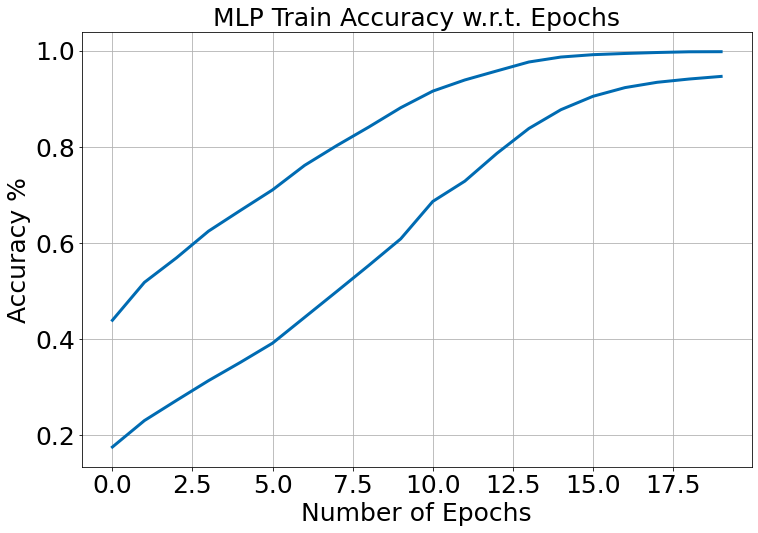

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

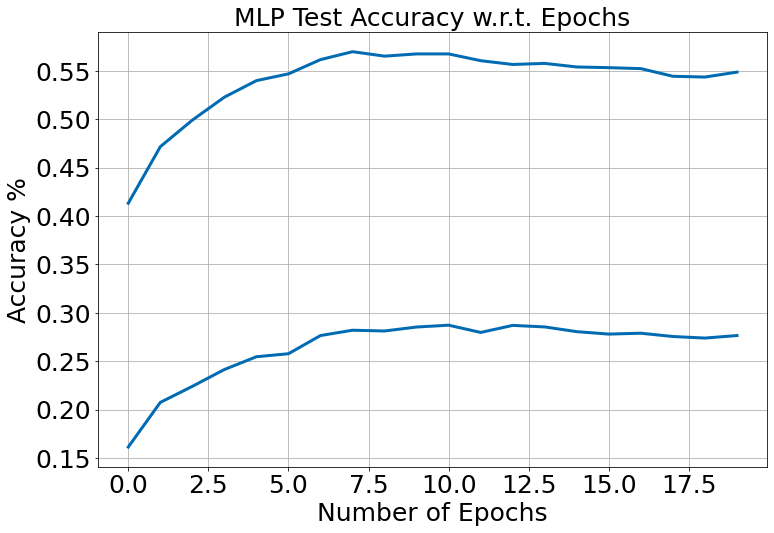

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

In [9]:
print("Epoch : {}, (top {}) Train Accuracy : {}, Test Accuracy : {}".format( epoch_+1,(1,5), trn_acc, tst_acc))

Epoch : 20, (top (1, 5)) Train Accuracy : [0.94648 0.99796], Test Accuracy : [0.2765 0.5487]


In [10]:
def evaluateClassification_topk(model, loader, device, topk = (1,), printing = True):
    # Evaluate Artificial Neural Network on Classification Task
    model.eval()
    correct = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        
        y_hat = model(x)
        
        pred = torch.argmax(y_hat, dim=1)#.squeeze()  
        correct += topk_accuracy(y_hat.T, y, topk)[1]

    acc = correct/len(loader.dataset) 
    if printing:
        print('Accuracy :\t', acc)   
    return acc

In [11]:
evaluateClassification_topk(model, train_loader, device, (1,5), False)

array([0.94648, 0.99796])